Add your information below and submit the file via canvas (till the end of the day) to claim points for participation.

Group number:

Collaborators (names or i-number):

# Data Analysis 2025

## Bootcamp 3 (Regression, Classification, Regularization)

### Part A: In this short tutorial, you will familiarize yourself with regression analysis. We will learn how to do descriptive regression analysis in python. We will use the `statsmodels` library and not the `sklearn` framework. After an introductory tutorial, you will work (in groups) on solving small exercises that we prepared for you. Submitting these will contribute to your participation bonus.

### References:
- More information on formula syntax: https://patsy.readthedocs.io/en/latest/formulas.html
- More information on statsmodels: https://www.statsmodels.org/dev/example_formulas.html

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')

## Statsmodels tutorial

We will use a dataset with information about patients with cardiovascular diseases. Here is the breakdown of columns:

Some variables are categorical:
- 'DEATH_EVENT': if the patient deceased during the follow-up period
- 'sex': male/female (binary, male 1, female 0)
- 'anaemia': decrease of red blood cells (boolean, yes 1)
- 'smoking': if the patient smokes or not (boolean, yes 1)
- 'diabetes': if the patient has diabetes (boolean, yes 1)
- 'high_blood_pressure': if the person has hypertension (boolean, yes 1)


... and some are continuous/discrete:
- 'age': patient's age
- 'creatinine_phosphokinase': level of CPK enzyme in the blood (mcg/L)
- 'ejection_fraction': percentage of blood leaving the heart in each contraction
- 'platelets': platelets in the blood (kiloplatelets/mL)
- 'serum_creatinine': level of serum creatinine in the blood (mg/dL)
- 'serum_sodium': level of serum sodium in the blood (mEq/L)
- 'time': duration of the follow-up period (number of days in the hospital)


In [3]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
68,70.0,0,161,0,25,0,244000.00,1.20,142,0,0,66,1
110,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90,1
168,65.0,0,582,1,40,0,270000.00,1.00,138,0,0,140,0
158,85.0,1,910,0,50,0,235000.00,1.30,134,1,0,121,0
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82,0
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
113,70.0,1,143,0,60,0,351000.00,1.30,137,0,0,90,1
210,70.0,0,212,1,17,1,389000.00,1.00,136,1,1,188,0
125,43.0,1,358,0,50,0,237000.00,1.30,135,0,0,97,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0


In [4]:
# 299 patients
len(df)

299

## A1. Linear regression: Modelling time spent at the hospital

- We will perform a regression analysis to model the number of days spent at the hospital, among the population of patients.


- To get started with our model, we need two components:

   1. The equation describing the model
   2. The data
   
   
- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.
    
    
- Intercepts are added by default.


- Categorical variables can be included directly by adding a term C(a). More on that soon!


- For (2), we can conveniently use pandas dataframe.

### An example

- Let's start with an example from our dataset. We are interested in two predictors: diabetes and high blood pressure. These are the two predictors that we want to use to fit the outcome, the number of days spent at the hospital, using a linear regression.

- A model that achieves this is formulated as:
        time ~ C(diabetes) + C(high_blood_pressure)
        
- We can create this model using smf.ols().

- OLS stands for ordinary least squares linear regression.

- The two components: the formula and the data are stated explicitly.

- The terms in the formula are columns in pandas dataframe. Easy!

In [5]:
# Declares the model
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)

In [7]:
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

In [8]:
# Print thes summary output provided by the library.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.097
Date:                Mon, 10 Feb 2025   Prob (F-statistic):            0.00254
Time:                        13:44:04   Log-Likelihood:                -1718.9
No. Observations:                 299   AIC:                             3444.
Df Residuals:                     296   BIC:                             3455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### A lot of useful information is provided by default.

- The dependent variable : time (number of days at the hospital)
- Method: The type of model that was fitted (OLS)
- Nb observations: The number of datapoints (299 patients)
- $R^2$: The fraction of explained variance
- A list of predictors
- For each predictor: coefficient, standard error of the coefficients, p-value, 95% confidence intervals. We can see that only high blood pressure is a significant predictor (p = 0.001), while diabetes is not (0.584).
- Warnings if there are numerical issues (hopefully not!)

### Now, we can interpret the model that we just fitted.

- Notice how C(diabetes)[T.1] is created based on the original diabetes feature. This means that the dummy variable is encoded such that the associated coefficient tells us about the value among the diabetes = yes subpopulation.


- We interpret the model in the following way: days at hospital = 139 + 4.9 * diabetes - 31.8 * high blood pressure. Thus:
    1. People who don't have diabetes nor high blood pressure stay at the hospital on average for 139 days
    2. People who have diabetes, but don't have blood pressure stay for 139 + 4.9 days ~ 144 days
    3. People who don't have diabetes, but have blood pressure stay for 139 - 31 days ~ 108 days
    4. People who have diabetes and blood pressure stay for 139 + 4.9 - 31.8 ~ 112 days
    
- We calculate the means explicitly to make sure they are the same as what we just calculated with regression!

In [9]:
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 0)]['time'].mean())
print(df.loc[(df['diabetes'] == 1) & (df["high_blood_pressure"] == 0)]['time'].mean())
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 1)]['time'].mean())
print(df.loc[(df['diabetes'] == 1) & (df["high_blood_pressure"] == 1)]['time'].mean())

139.0
144.8170731707317
108.25806451612904
111.46511627906976


- Isn't it strange that high blood pressure has a negative coefficient? It seems like the patients who have high blood pressure stay at the hospital for shorter number of days, even though one would expect the opposite. Lets' get to that!

## A2. Linear regression with interaction terms: Modelling time spent at the hospital V2

- One reason why serious conditions can be associated with lower time spent at the hospital is because of a third confounding factor: death 💀. Patients who have a serious condition might spend less time at the hospital because they die.

- Let's get a better sense of what is happening by modeling the time spent at the hospital with death as a predictor.

- This time we will add interaction features.

In [10]:
# we use a*b to add terms: a, b, a:b, and intercept

mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df)


res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           4.32e-22
Time:                        13:47:50   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Interpretation:

- This model lets us see that death is associated with a lower number of days spent at the hospital.
- Notice how R2 is much larger compared to the previous model: more variance in the data is explained.
- Those that have high blood pressure stay for less time (-26 days on average), those who have blood pressure __and__ die spend 2.7 days more hospitalized on average, although this is not statistically significant.

## A3. Logistic regression: Modelling the binary death outcome

- Finally, let's model the binary outcome of death, based on all patients' features.
- We will exclude time spent at the hospital, since we saw how it is strongly correlated with death.

### First, we will do standardization of continuous predictors. This will let us interpret the predictors that are of vastly different scales (from percents to thousands).

In [11]:
# how we standardize the countinuous variables

df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - df['creatinine_phosphokinase'].mean())/df['creatinine_phosphokinase'].std()
df['ejection_fraction'] = (df['ejection_fraction'] - df['ejection_fraction'].mean())/df['ejection_fraction'].std()
df['platelets'] = (df['platelets'] - df['platelets'].mean())/df['platelets'].std()
df['serum_creatinine'] = (df['serum_creatinine'] - df['serum_creatinine'].mean())/df['serum_creatinine'].std()
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean())/df['serum_sodium'].std()

### Instead of linear, we will now use a logistic regression to model the binary outcome.

In [12]:
# logit is logistic regression. The other parameters are the same as before

mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.2160
Time:                        13:56:36   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1633      0.362     -3.214      0.001   

#### Looks good! We have a reasonably high R2 (0.216). In addition to reading the coefficients from the summary table, let's access them programmatically from the res object.

In [13]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-1.872683,-0.453819
C(diabetes)[T.1],-0.431428,0.734243
C(high_blood_pressure)[T.1],-0.180976,1.018851
C(sex)[T.1],-1.086628,0.288599
C(anaemia)[T.1],-0.171894,1.007753
C(smoking)[T.1],-0.547629,0.818807
age,0.356256,0.968609
creatinine_phosphokinase,0.010320,0.553497
ejection_fraction,-1.177018,-0.487482
platelets,-0.379319,0.240561


### Now we can visualize the effect of all the predictors. Let's first sort them by the coefficients.

In [14]:
# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)

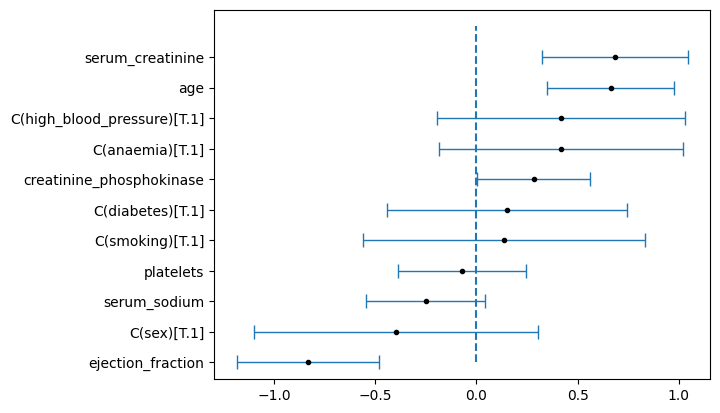

In [16]:
# fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

### Interpretation:
- Serum creatinine level in the blood and age are significant positive predictors of death.
- High ejection fraction (a healthy heart) is a sigificant negative predictor of death.
- Since all predictors are standardized, we can interpret in the following way:
    - When all other predictors take mean values, an increase of age by 1 standard deviation, leads on average to an increase by 0.66 of log odds of death.
    - When all other predictors take mean values, increase of ejection fraction by 1 standard deviation, leads on average to a  decrease by 0.83 of log odds of death.

### Interpreting log odds

- Why log odds? remember that that's what logistic regression models.
    - Notice that log odds are a bit difficult to interpret.
    - If an event has probability p, it has odds p/(1-p).
    - This is a non-linear transformation over p. See the plot below!

Text(0, 0.5, 'log odds')

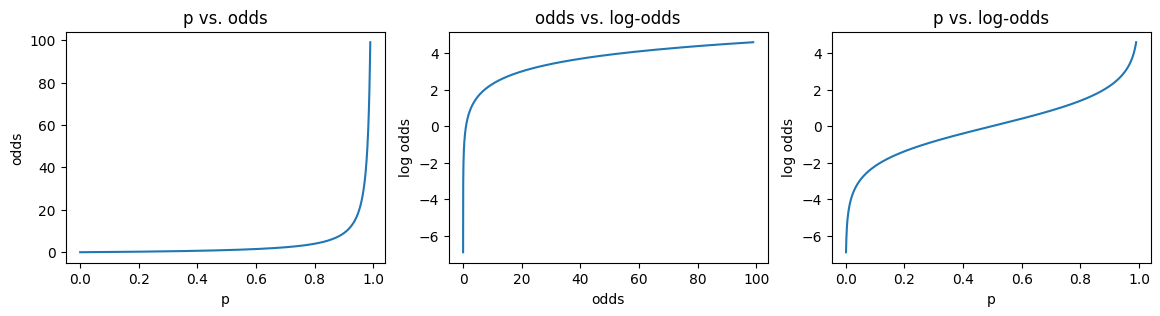

In [17]:
np.seterr(divide = 'ignore') 
fig, axs = plt.subplots(1, 3, figsize=(14,3))
p = np.linspace(0, 0.99, 1000)
odds = p/(1-p)
axs[0].set_title("p vs. odds")
axs[0].plot(p, odds)
axs[0].set_xlabel("p")
axs[0].set_ylabel("odds")

axs[1].set_title("odds vs. log-odds")
axs[1].plot(odds, np.log(odds))
axs[1].set_xlabel("odds")
axs[1].set_ylabel("log odds")

axs[2].set_title("p vs. log-odds")
axs[2].plot(p, np.log(odds))
axs[2].set_xlabel("p")
axs[2].set_ylabel("log odds")

With this in mind, calculate:

1. If p = 0.1 and you have a change in log odds equals to +0.66, what will be your new p?

1. If p = 0.9 and you have a change in log odds equals to +0.66, what will be your new p?

In [19]:
"""Your code here"""
p = 0.9
odds = p/(1-p) 
log_odds = np.log(odds)
log_odds_new = log_odds + 0.66

odds_new = np.exp(log_odds_new)
p_new = odds_new / (1 + odds_new)
p_new
print(p_new)

0.9456909311361745


In [22]:
def calculate_p(p, log_odds_change):
    odds = p/(1-p)
    log_odds = np.log(odds) + log_odds_change 
    odds = np.exp(log_odds)
    p = odds / (1 + odds)
    return p

print(calculate_p(0.9, 0.66))
print(calculate_p(0.1, 0.66))

0.9456909311361745
0.17693910183506342


### Controlling for variables

Notice that independent variables (those used as features of our regression model) are often correlated!

For instance serum creatinine, a blood measurement, is an important indicator of kidney health. 
We may want to study its impact in patients' outcomes (in this case, death).

1. Using a logistic regression model, estimate the effect of serum creatinine to a patient's health.

In [23]:
"""Your code here"""
mod = smf.logit(formula='DEATH_EVENT ~  creatinine_phosphokinase', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.625804
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                0.002979
Time:                        14:20:19   Log-Likelihood:                -187.12
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                    0.2903
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.7511      0.124     -6.049      0.000      -0.994

2. Notice that serum creatinine is significantly correlated with age, that is, the older you are, the highest your value for serum creatinine will be (which is bad!). With this in mind, repeat the logistic regression now using serum creatinine _and_ age as predictor variables. What do you think will happen to the coefficient of serum-creatinine? Decrease or increase?

They seem slightly positively correlated so maybe decrease slightly as age migth be able to contribute more to the explanation.

In [18]:
import scipy.stats as stats
stats.pearsonr(df["age"].values, df["serum_creatinine"])

(0.1591871332835501, 0.0058034329412028325)

In [24]:
"""Your code here"""
mod = smf.logit(formula='DEATH_EVENT ~ age * creatinine_phosphokinase', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.588830
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                 0.06189
Time:                        14:21:36   Log-Likelihood:                -176.06
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.619e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.8204      0.132     -6.225      0.000

### Log-transformations


Remember from class that a log transform in the dependent variable (y) makes the model multiplicative.

1. Fit a linear model to predict the time spent in the hospital (`time`) as a function of variables `high_blood_pressure`, `diabetes` and `DEATH_EVENT`.

2. Now perform a log transform in the variable `time`, that is, create another column in the dataframe containing the `log` of time. Repeat the model, now using the log of time as the dependent variable.

3. Calculate what is the _additive_ effect of having `high_blood_pressure` in the time spent in the hospital in the first model, and what is the _multiplicative_ effect of having `high_blood_pressure` in the second.

In [20]:
# reload the data to undo the std transforms
data_folder = './data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')

In [ ]:
"""Your code here"""
df['log_time'] = np.log(df['time'])

In [37]:
mod_old = smf.ols(formula='time ~ C(high_blood_pressure) + C(DEATH_EVENT) + C(diabetes)',
              data=df)

mod = smf.ols(formula='log_time ~ C(high_blood_pressure) + C(DEATH_EVENT) + C(diabetes)',
              data=df)

res_old = mod_old.fit()
print(res_old.summary())

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.69
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           6.12e-23
Time:                        14:38:10   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3350.
Df Residuals:                     295   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [42]:
display(df.head())
p_high_blood_pressure = df['high_blood_pressure'].mean()
print(f"Probability of having high blood pressure: {p_high_blood_pressure}")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,log_time
0,1.190949,0,0.000165,0,-1.527998,1,1.678834e-02,0.489237,-1.501519,1,0,4,1,1.386294
1,-0.490457,0,7.502063,0,-0.007065,0,7.523048e-09,-0.284076,-0.141739,1,0,6,1,1.791759
2,0.350246,0,-0.449186,0,-1.527998,0,-1.036336e+00,-0.090748,-1.728149,1,1,7,1,1.945910
3,-0.910808,1,-0.485257,0,-1.527998,0,-5.455595e-01,0.489237,0.084892,1,0,7,1,1.945910
4,0.350246,1,-0.434757,1,-1.527998,0,6.507077e-01,1.262550,-4.674340,0,0,8,1,2.079442


Probability of having high blood pressure: 0.3511705685618729


In [38]:
multiplicative_effect = np.exp(res.params['C(high_blood_pressure)[T.1]'])
print(f"Multiplicative effect of high blood pressure: {multiplicative_effect}")

Multiplicative effect of high blood pressure: 0.7977711948481768


## Part B: In the second part, we focus on applying ML with scikit-learn and more specifically we will be using the following libraries: `scikit-learn`, `pandas`, `matplotlib`.



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
# import seaborn as sns
%matplotlib inline

# Linear Regression: Predicting sales from ads expense

<img src="img/ada_ads.jpg" width="300">

Let's import the dataset:

In [40]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

In [45]:
data.shape

(200, 4)

Visualize the relationship between the features and the response

<Axes: xlabel='newspaper', ylabel='sales'>

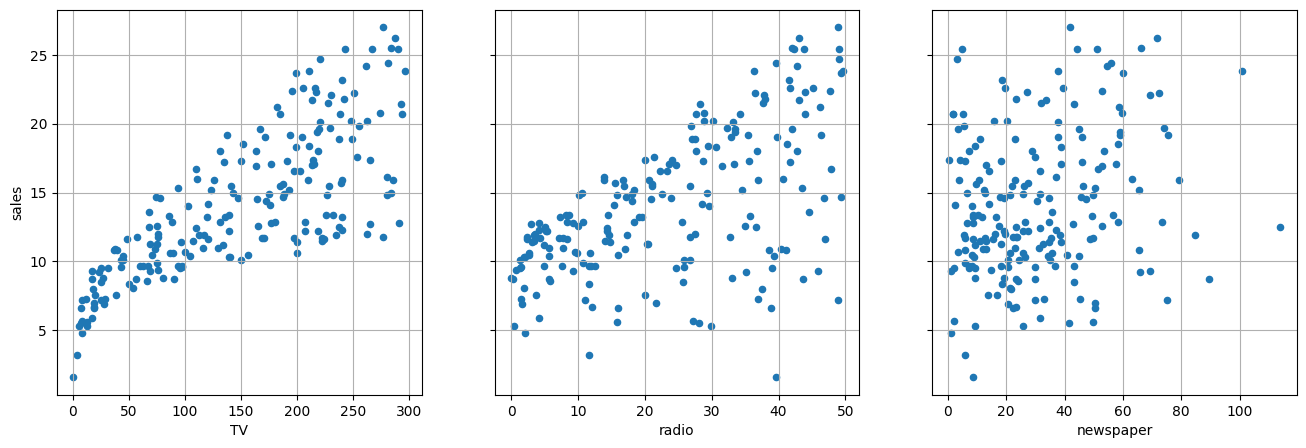

In [46]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="img/slope_intercept.png">

## Hands on!
Let's create the feature matrix and the class vector (X and y):

In [47]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


**Scikit-learn** provides an easy way to train the model:

In [48]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

Back to the theory! Let's see what the formula looks like:

In [49]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.0457646454553976 * TV + 
0.18853001691820445 * radio + 
-0.0010374930424763285 * newspaper + 
2.938889369459412




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

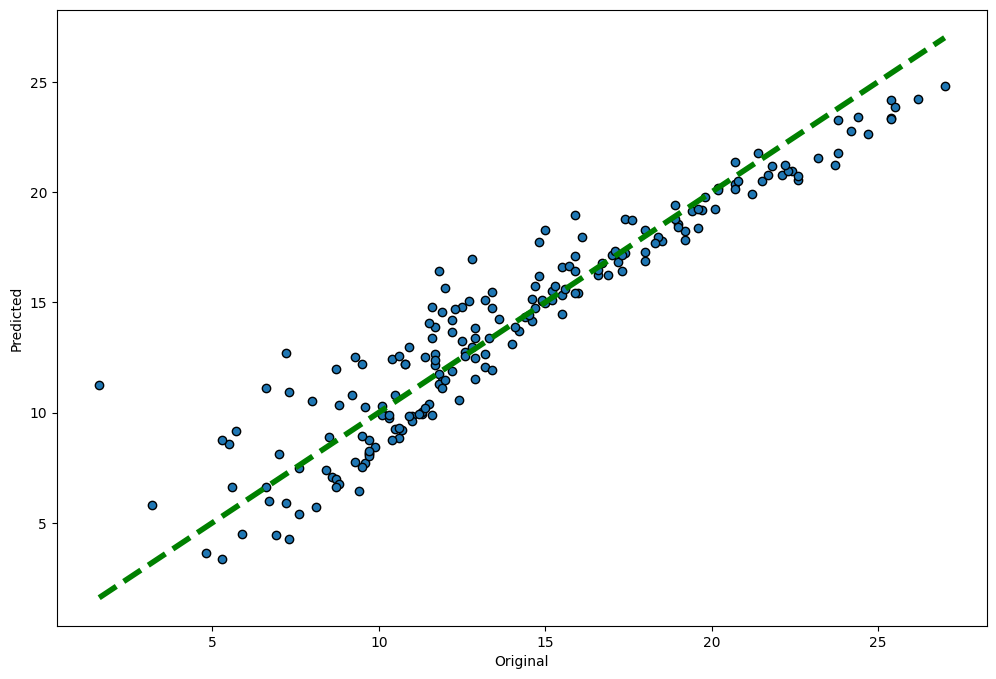

In [50]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'g--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

If you wanna recall cross-validation refer to the course material.

Print the MSE:

In [51]:
mean_squared_error(y, predicted)

3.0729465971002092

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

In [57]:
X = X[:5]
y = y[:5]

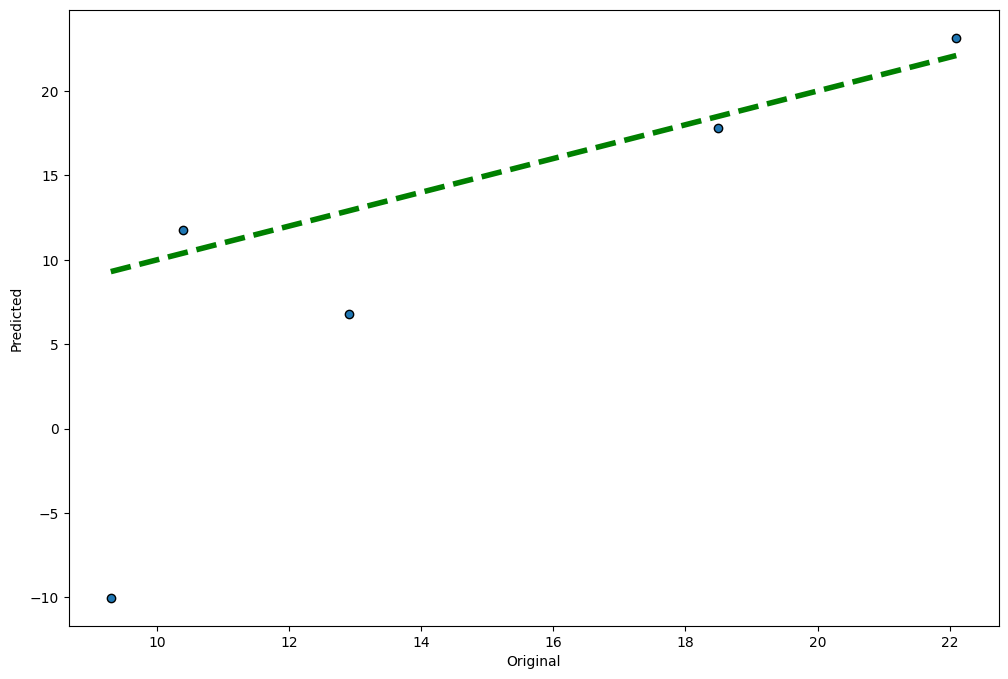

In [58]:
lr = LinearRegression()

predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'g--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [59]:
mean_squared_error(y, predicted)

82.77419262404155

**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

In the code below, experiment with different values for the regularization parameter `alpha` (or $\lambda$ in the course slides) and write your short remarks. 

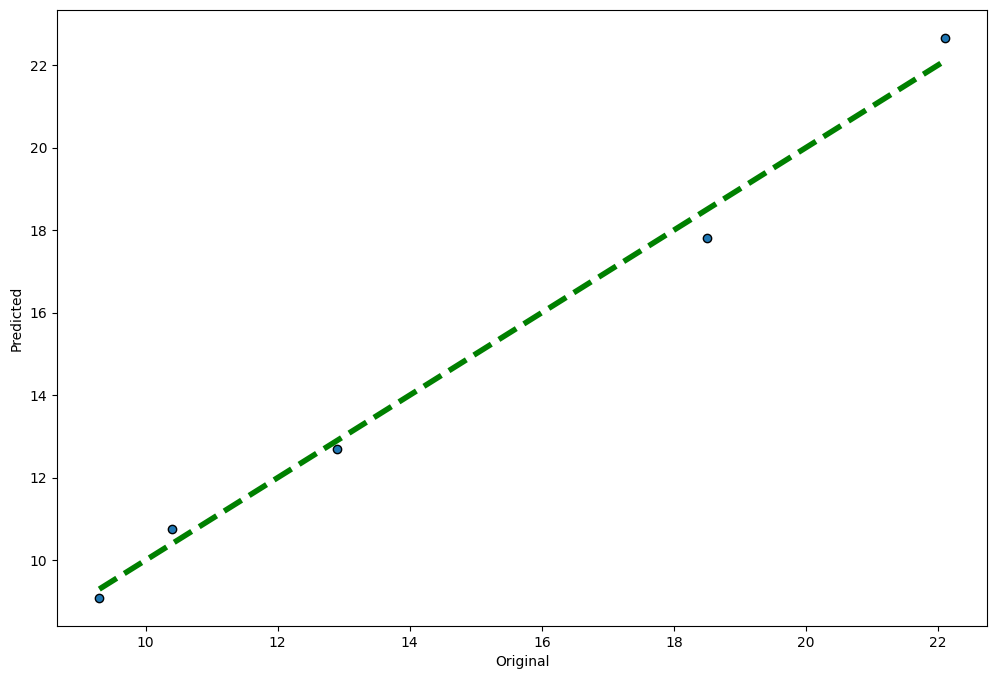

In [62]:
#change the value of alpha
ridge = Ridge(alpha=0.1, fit_intercept=False)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'g--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [63]:
mean_squared_error(y, predicted_r)

0.19771672134214943

// Write your remarks here

-------
# Predicting Titanic survival with Logistic Regression

Let's use the data obtained by the _Encyclopedia Titanica_ to predict if a passenger survived the Titanic disaster.

<img src="img/titanic.jpg" width="600">

Let's import the dataset:

In [73]:
titanic = pd.read_excel(r'C:\Users\wk218\Desktop\courses\data_analysis_um_course\bootcamps\bootcamp3\data\titanic.xls')
titanic.head(5)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


What are the **features**?
- name: Name of the passenger
- sex: Male or Female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Ticket price
- cabin: Cabin number
- embarked: Port of Embarkation

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [74]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(titanic)))

Survived 500, Dead 809
Survived 38.20%


Specify the columns to use as features:

In [75]:
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

For the sake of this execise, we can assume the other features (name, cabin number, embarked) are not predictive.

### Let's prepare the feature vector for the training

The dataset contains one categorical variable: sex (male|female)

We need to convert it to a numerical variable. Pandas offers the method *get_dummies* that takes care of this:

In [76]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()

,age,sibsp,parch,fare,sex_female,sex_male
0,29.0000,0,0,211.3375,True,False
1,0.9167,1,2,151.5500,False,True
2,2.0000,1,2,151.5500,True,False
3,30.0000,1,2,151.5500,False,True
4,25.0000,1,2,151.5500,True,False


The categorical feature _sex_ is converted in 2 boolean features.

Titanic sank in 1912: it was a lot of time ago! Some data may be missing. Let's check if there are undefined values.

In [77]:
len(X[X.isna().any(axis=1)])

264

Let's try to fix the data with a basic imputation method: replacing the missing values with the mean.

More info: https://en.wikipedia.org/wiki/Imputation_(statistics)

In [78]:
X = X.fillna(X.mean())

len(X[X.isna().any(axis=1)])

0

The label used for the traning:

In [79]:
y = titanic['survived']

Let's train the model ...

In [80]:
logistic = LogisticRegression(solver='lbfgs')

... and evaluate the precison/recall with a cross validation (10 splits).

In [81]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.72 (+/- 0.13)
Recall: 0.68 (+/- 0.16)


Logistic regression uses a threshold on the probability to decide at which class to assign a prediction. In some cases, we are interested to understand how the model behaves at different levels of this threshold.

Let's give a look at the ROC curve, which we discussed in class.

In [82]:
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

... and plot the result:

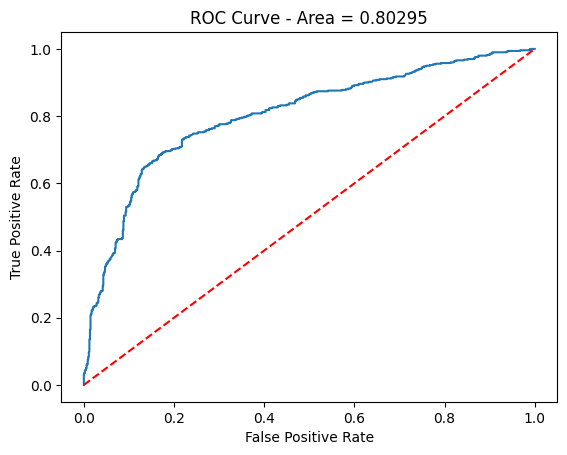

In [83]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

### Explore the model output

Let's train on the full dataset:

In [84]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)

LogisticRegression()

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you have survived?

Remember the features:

In [85]:
X.columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male'], dtype='object')

In [86]:
display(X.head())

,age,sibsp,parch,fare,sex_female,sex_male
0,29.0000,0,0,211.3375,True,False
1,0.9167,1,2,151.5500,False,True
2,2.0000,1,2,151.5500,True,False
3,30.0000,1,2,151.5500,False,True
4,25.0000,1,2,151.5500,True,False


Would a man, 25 years old without relative onboard, and with a fare of 100 survive?

No the sample will not survive

In [89]:
'''your code here'''
sample = [25, 0, 0, 100, False, True]
print(logistic.predict([sample]))

[0]


What is the probability distribution behind this prediction?

In [90]:
'''your code here'''
probabilities = logistic.predict_proba([sample])
print(probabilities)

[[0.5528599 0.4471401]]


What about a woman, 35 years old, alone onboard and with the same fare?

Yes she would survive. We see that the woman had twice as good odds of survival compared to the man.

In [91]:
'''your code here'''

sample = [35, 0, 0, 100, True, False]
print(logistic.predict([sample]))
probabilities = logistic.predict_proba([sample])
print(probabilities)

[1]
[[0.11464109 0.88535891]]


-------
## Small Exercises



### Question 1: Which of the following is true for logistic regression:

Which of the following is true for logistic regression:

 - a) it is (in principle) slower in training than k-NN
 - b) can handle complex decision boundaries
 - c) it doesn’t require additional retraining to make predictions that take into account freshly obtained data points
 - d) all of the above

A - true since knn does not require training.

### Question 2: A logistic regression model...

 - a) is trained by minimizing the least-squares error
 - b) makes predictions in the range [0,1]
 - c) makes predictions in the range [0,+inf] 
 - d) Can perfectly separate white from gray dots as a linear function of x = [x1, x2]  when x1, x2 ∈ {0, 1} and y = x1 XOR x2, as in the following picture: 

<img src="img/q4.png" width="250">

I think only b is correct and we choose a cutoff for the binary classification.

### Question 3: In the following statements, "bias" and "variance" refer to the bias-variance trade-off when it comes to models. Which ones are true or false?

- a) A model trained with $n$ training points is likely to have lower variance than a model trained with $2n$ training points
- b) If my model is underfitting, it is more likely to have high bias than high variance
- c) Increasing the number of parameters in a model usually improves the test set accuracy
- d) Adding L2-regularization usually reduces variance in linear regression

d - true, - l2 can reduce variacne and lower overfitting
c - not really we just overfit and might fail on the test set - false
b - underfitting - high bias, low variance - makes sense - true  - when model is too simple to capture the patterns so high bias and low var.
a - false - more params = less variance normally as we can make more stable descision
